1) Решить систему линейных алгебраических уравнений   методом Монте-Карло.  
2) Сравнить с решением данного уравнения, полученным в произвольном математическом пакете.  
3) Построить график зависимости точности решения от длины цепи маркова и числа смоделированных цепей маркова.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from math import sqrt

from sklearn.metrics import mean_squared_error 

%matplotlib inline

In [2]:
A = np.array([[1, -0.5, 0.9],
             [0.1, 1.5, -0.1],
             [0.1, -0.8, 0.2]])
A

array([[ 1. , -0.5,  0.9],
       [ 0.1,  1.5, -0.1],
       [ 0.1, -0.8,  0.2]])

In [3]:
F = np.array([1, 3, -1])
F

array([ 1,  3, -1])

Equation solution using **numpy.linalg.solve**

In [4]:
python_solution = np.linalg.solve(A,F)
python_solution

array([-12.14285714,   3.92857143,  16.78571429])

Преобразуем матрицу A так, что бы    
1) при вычитании этой матрицы из единичной матрицы, сумма модулей коэффициентов в каждой строке была < 1  
2) каждое значение x,y,z выражалось через все остальные (вычитаем матрицу из единичной)

In [5]:
a = np.copy(A)
f = np.copy(F)

In [6]:
a[1] += a[2] * 2
f[1] += f[2] * 2

a[0] -= a[1] * 2
f[0] -= f[1] * 2

a[0] -= a[1]
f[0] -= f[1]

a[2] -= a[0] * 4
f[2] -= f[0] * 4

a[1] += a[2]
f[1] += f[2]

a[[0, 1]] = a[[1, 0]]
f[[0, 1]] = f[[1, 0]]

a[[0, 2]] = a[[2, 0]]
f[[0, 2]] = f[[2, 0]]

a[0] *= -1
f[0] *= -1

a[1] *= -1
f[1] *= -1

In [7]:
a = np.eye(len(a)) - a #2)
a

array([[ 7.00000000e-01, -1.11022302e-15,  2.00000000e-01],
       [ 1.00000000e-01,  8.00000000e-01, -1.11022302e-16],
       [-5.55111512e-16,  1.00000000e-01,  5.00000000e-01]])

In [8]:
#моделируем реализацию цепи Маркова длины N
def count_ksi(N, A, f, h, pi, p):
    #N - длина цепи Маркова
    #pi - вектор начальных вероятностей цепи Маркова
    #p - матрица переходных состояний(вероятностей) цепи Маркова
        
    #цепь Маркова
    i = []
    
    alpha = random.random()

    #index of state that will be implemented
    ind_state = 0
    sum_state = pi[0]
    while alpha >= sum_state:
        ind_state += 1
        sum_state += pi[ind_state]
    i.append(ind_state)
    
    #Веса состояний цепи Маркова
    Q = []

    #Вычисляем веса цепи Маркова
    if(pi[i[0]] > 0):
        Q.append(h[i[0]] / pi[i[0]])
    else: #pi[i[0]] = 0
        Q.append(0)
    
    ksi = Q[0] * f[i[0]]

    for k in range(1, N):
        alpha = random.random()
        
        #index of state that will be implemented
        ind_state = 0
        sum_state = pi[0]
        while alpha >= sum_state:
            ind_state += 1
            sum_state += pi[ind_state]
        i.append(ind_state)
        
        if(pi[i[k]] > 0):
            Q.append(Q[k-1] * a[i[k-1], i[k]] / p[i[k-1]][i[k]])
        else:
            Q.append(0)
 
        ksi += Q[k] * f[i[k]]
    
    return ksi

In [9]:
def linalg_monte_carlo(a, f, N, m):
    #N - длина цепи Маркова
    #m - количество реализаций цепи Маркова
    
    #размерность системы
    n = len(A)
    
    #решение системы
    x = np.zeros(n)
    
    h = np.identity(n)
    
    #вектор начальных вероятностей цепи Маркова
    pi = [1 / n] * n
    
    #матрица переходных состояний(вероятностей) цепи Маркова
    p = [[1 / n] * n for _ in range(n)]

    for j in range(n):
        x[j] = sum(count_ksi(N, a, f, h[:, j], pi, p) for _ in range(m)) / m
        
    print(x)
    
    return x

In [10]:
def plot(x, y, x_label, y_label):
    plt.plot(x, y)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [19]:
NN = [200, 800, 1000, 1500, 2000, 3000, 4000, 5000, 6000]
M = [200, 800, 1000, 1500, 2000, 3000, 4000]

[-13.91371888   0.63429718  15.04990906]
[-7.63069171  1.05004832 13.76039219]
[-6.59021961  4.83659881 19.08671547]
[-12.4486248    3.28969159  16.55475604]
[-10.26093015   1.27473647  16.87535113]
[-9.66460173  6.68449923 15.67167879]
[-12.636548     4.11991095  17.83361952]


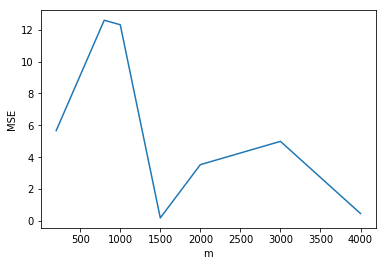

In [15]:
answers_N_fixed = [linalg_monte_carlo(a, f, 1500, i) for i in M]

mse_N_fixed = []

for answer in answers_N_fixed:
    mse_N_fixed.append(mean_squared_error(python_solution, answer))

plot(M, mse_N_fixed, "m", "MSE")

[-11.39858648   3.18060967  17.40056605]
[-22.27704743   8.28370266  18.16732529]
[-9.88815253  2.09881081 16.03331735]
[-10.12515864   4.05862441  18.77785931]
[-9.19393739  3.57435338 16.31984227]
[-12.59914522   2.3984019   16.78782329]
[-10.97340648   5.85236865  18.24526812]
[-10.64474706   2.26318743  21.16849775]
[-9.62042151  2.31372139 16.54307569]


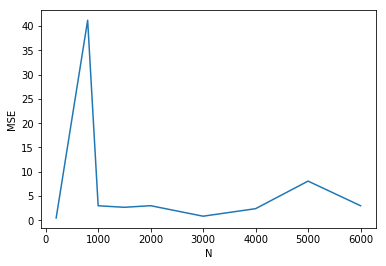

In [22]:
answers_m_fixed = [linalg_monte_carlo(a, f, i, 1500) for i in NN]

mse_m_fixed = []

for answer in answers_m_fixed:
    mse_m_fixed.append(mean_squared_error(python_solution, answer))

plot(NN, mse_m_fixed, "N", "MSE")